**Google Drive connection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Hardware characteristics**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Aug 19 01:20:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np

**Assignation of data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ProyectoFinalPatterns/heart.csv')

**About dataset**

Age : Age of the pacient

Sex : Sex of the pacient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

      Value 1: typical angina

      Value 2: atypical angina

      Value 3: non-anginal pain

      Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


* Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold.

There are three types of blood vessels:

Arteries carry blood away from your heart.
Veins carry blood back toward your heart.
Capillaries, the smallest blood vessels, connect arteries and veins.

Heart-related causes

Examples of heart-related causes of chest pain include:

Heart attack. A heart attack results from blocked blood flow, often from a blood clot, to the heart muscle.

Angina. Angina is the term for chest pain caused by poor blood flow to the heart. This is often caused by the buildup of thick plaques on the inner walls of the arteries that carry blood to the heart. These plaques narrow the arteries and restrict the heart's blood supply, particularly during physical activity.

Aortic dissection. This life-threatening condition involves the main artery leading from the heart (aorta). If the inner layers of this blood vessel separate, blood is forced between the layers and can cause the aorta to rupture.
Inflammation of the sac around the heart (pericarditis). This condition usually causes sharp pain that gets worse when breathing in or lying down.

**Return of the five first rows**

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Return of the last 5 rows**

In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Return a tuple representing the dimensionality of the DataFrame (rows x colummns)**

In [ ]:
data.shape

(303, 14)

**Generate descriptive statistics**

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data[['age', 'trtbps', 'chol', 'thalachh']].describe()

,age,trtbps,chol,thalachh
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


**Return the number of missing values in the data set**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Set aspects of the visual theme for all matplotlib and seaborn plots**

This function changes the global defaults for all plots using the matplotlib rcParams system. The themeing is decomposed into several distinct sets of parameter values.

In [ ]:
import seaborn as sns
sns.set()

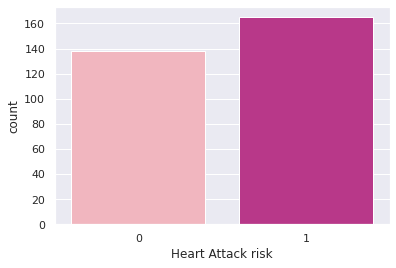

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x = data['output'], palette= 'RdPu')
plt.xlabel('Heart Attack risk');

**Plot rectangular data as a color-encoded matrix**

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

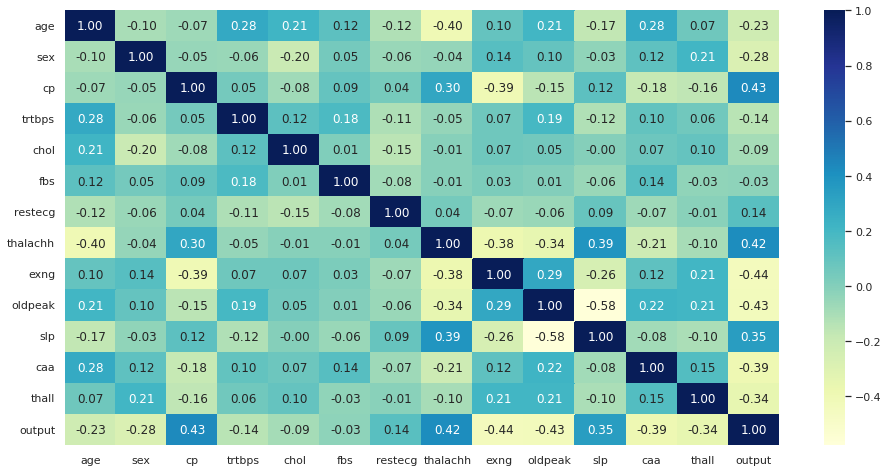

In [ ]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

**Set the parameters that control the scaling of plot elements**

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style. This is accomplished using the matplotlib rcParams system.

The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by different values. Font elements can also be scaled independently of (but relative to) the other values.

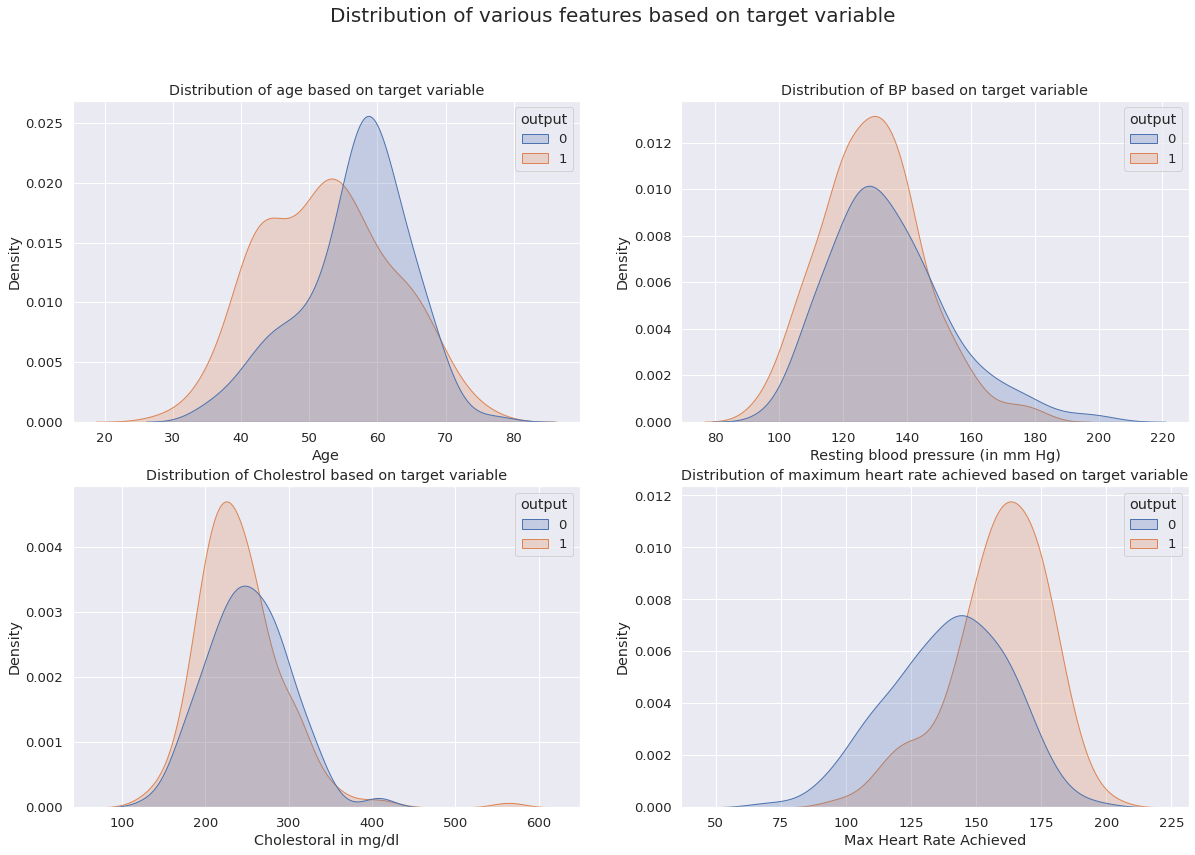

In [ ]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='age', data= data, hue= 'output', shade= True, ax= ax[0, 0])
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.kdeplot(x ='trtbps', data= data, hue= 'output', shade= True, ax= ax[0, 1])
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.kdeplot(x ='chol', data= data, hue= 'output', shade= True, ax= ax[1, 0])
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.kdeplot(x ='thalachh', data= data, hue= 'output', shade= True, ax= ax[1, 1])
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

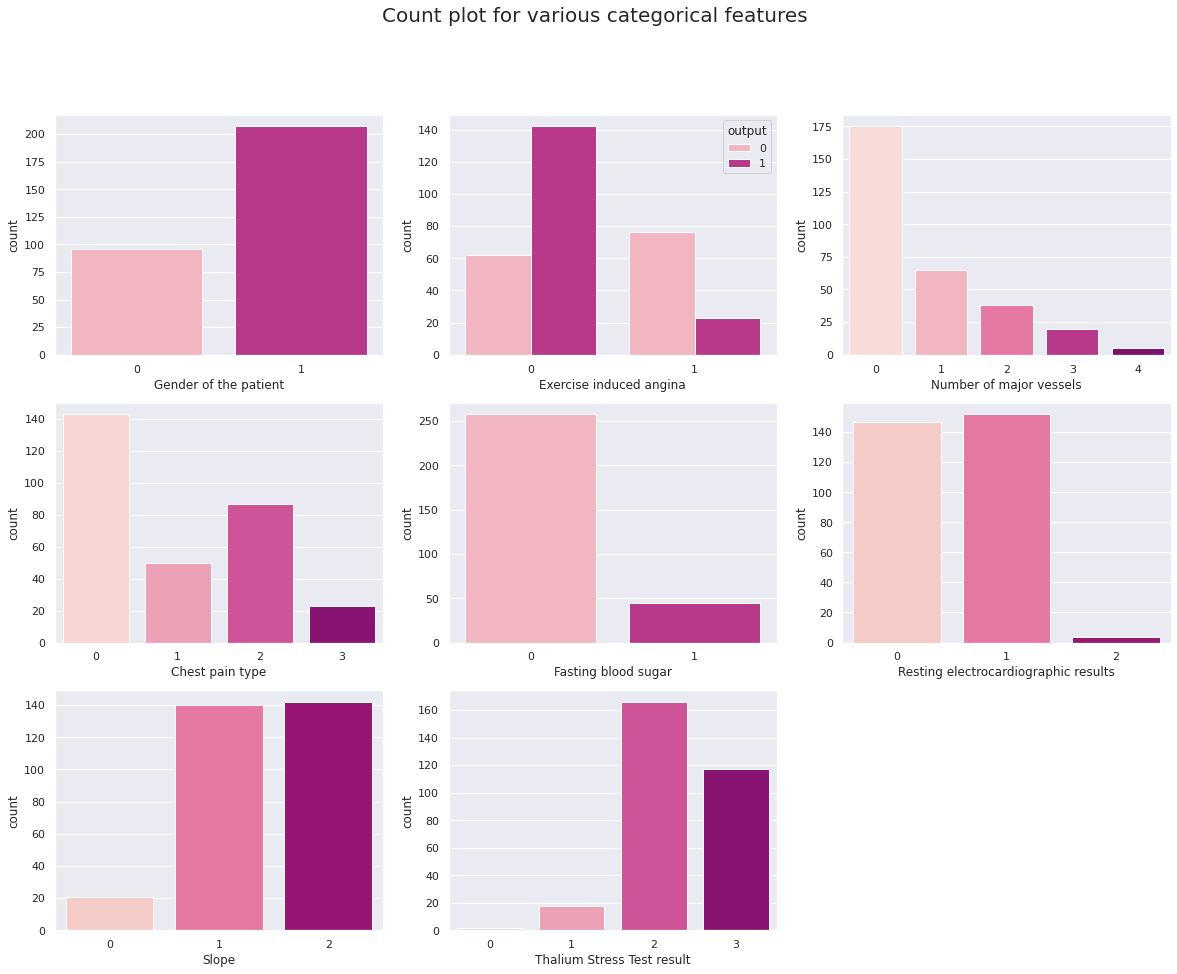

In [ ]:
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= data, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= data, hue= 'output', ax= ax[0, 1], palette= 'RdPu')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= data, ax= ax[0, 2], palette= 'RdPu')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= data, ax= ax[1, 0], palette= 'RdPu')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= data, ax= ax[1, 1], palette= 'RdPu')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= data, ax= ax[1, 2], palette= 'RdPu')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= data, ax= ax[2, 0], palette= 'RdPu')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= data, ax= ax[2, 1], palette= 'RdPu')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

**Show the counts of observations in each categorical bin using bars**

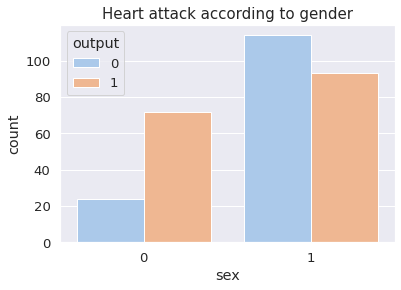

In [ ]:
sns.countplot(x = 'sex', data= data, hue= 'output', palette= 'pastel')
plt.title('Heart attack according to gender', fontsize = 15);

**Assignation of data**

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/ProyectoFinalPatterns/o2Saturation.csv')

**Return of the last 5 rows**

In [ ]:
data2.tail()

,98.6
3580,98.6
3581,98.6
3582,98.6
3583,98.6
3584,98.6


**Pattern Recognition System**

In [ ]:
# Import some libraries for keras and tensorflow
from __future__ import division

import keras
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print ('Using Keras version', keras.__version__) # Keras version

Using Keras version 2.8.0


**Set inputs and outputs for datasets**

In [ ]:
from numpy.random import RandomState
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ProyectoFinalPatterns/heart.csv')
rng = RandomState()

train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]


**Selection of data to build Xtrain, Ytrain, Xset, and Yset**

In [ ]:
x_train = train.iloc[:, :12] 
y_train = train.iloc[:, 13:]

x_test = test.iloc[:, :12] 
y_test = test.iloc[:, 13:]

**Recognition Models**

**NaiveBayes (NB)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

**Check datatypes in sets**

In [ ]:
x_train.dtypes
y_train.dtypes
x_test.dtypes
y_test.dtypes

output    int64
dtype: object

In [ ]:
df.shape

(303, 14)

In [ ]:
print(f"Shape of x_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of x_train (242, 12)
Shape of y_train (242, 1)
Shape of x_test (61, 12)
Shape of y_test (61, 1)


**Model creation and learning with fit**

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

**Predict the results**

In [ ]:
y_pred = gnb.predict(x_test)

y_pred = gnb.predict(x_test)
y_pred

print('Precision in the training set: {:.2f}'.format(gnb.score(x_train, y_train)))
print('Precision in the test set: {:.2f}'.format(gnb.score(x_test, y_test)))

Precision in the training set: 0.80
Precision in the test set: 0.87


**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8689


**Confusion matrix**

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_train, y_train)
plt.show()

**K Nearest Neighbors (KNN)**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

**Accuracy**

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(knn.score(x_train, y_train)))


Model accuracy score: 0.7810


**Predict the results**


In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_train

print('Precision in the training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Precision in the test set: {:.2f}'.format(knn.score(x_test, y_test)))

Precision in the training set: 0.78
Precision in the test set: 0.67


**Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


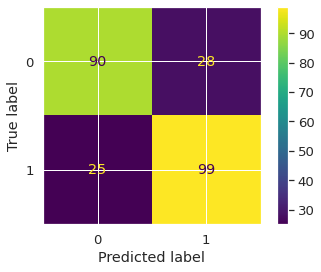

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_train, y_train)
plt.show()

**Support Vector Machine (SVN)**

In [ ]:
from sklearn.svm import SVC

algoritmo = SVC(kernel='linear')
algoritmo.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

**Accuracy**

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(algoritmo.score(x_train, y_train)))

Model accuracy score: 0.8182


**Predict the results**

In [ ]:
y_pred_train = algoritmo.predict(x_train)
y_pred_train

print('Precision in the training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Precision in the test set: {:.2f}'.format(knn.score(x_test, y_test)))

Precision in the training set: 0.78
Precision in the test set: 0.67


**Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


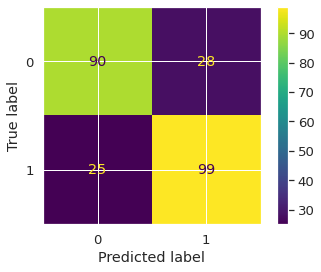

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_train, y_train)
plt.show()

**Decision trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

trees = DecisionTreeClassifier(criterion="entropy")
trees.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

**Accuracy**

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(trees.score(x_train, y_train)))

Model accuracy score: 1.0000


**Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


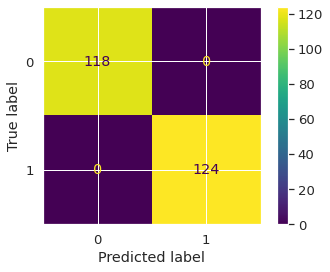

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(trees, x_train, y_train)
plt.show()

**Decision tree graph**

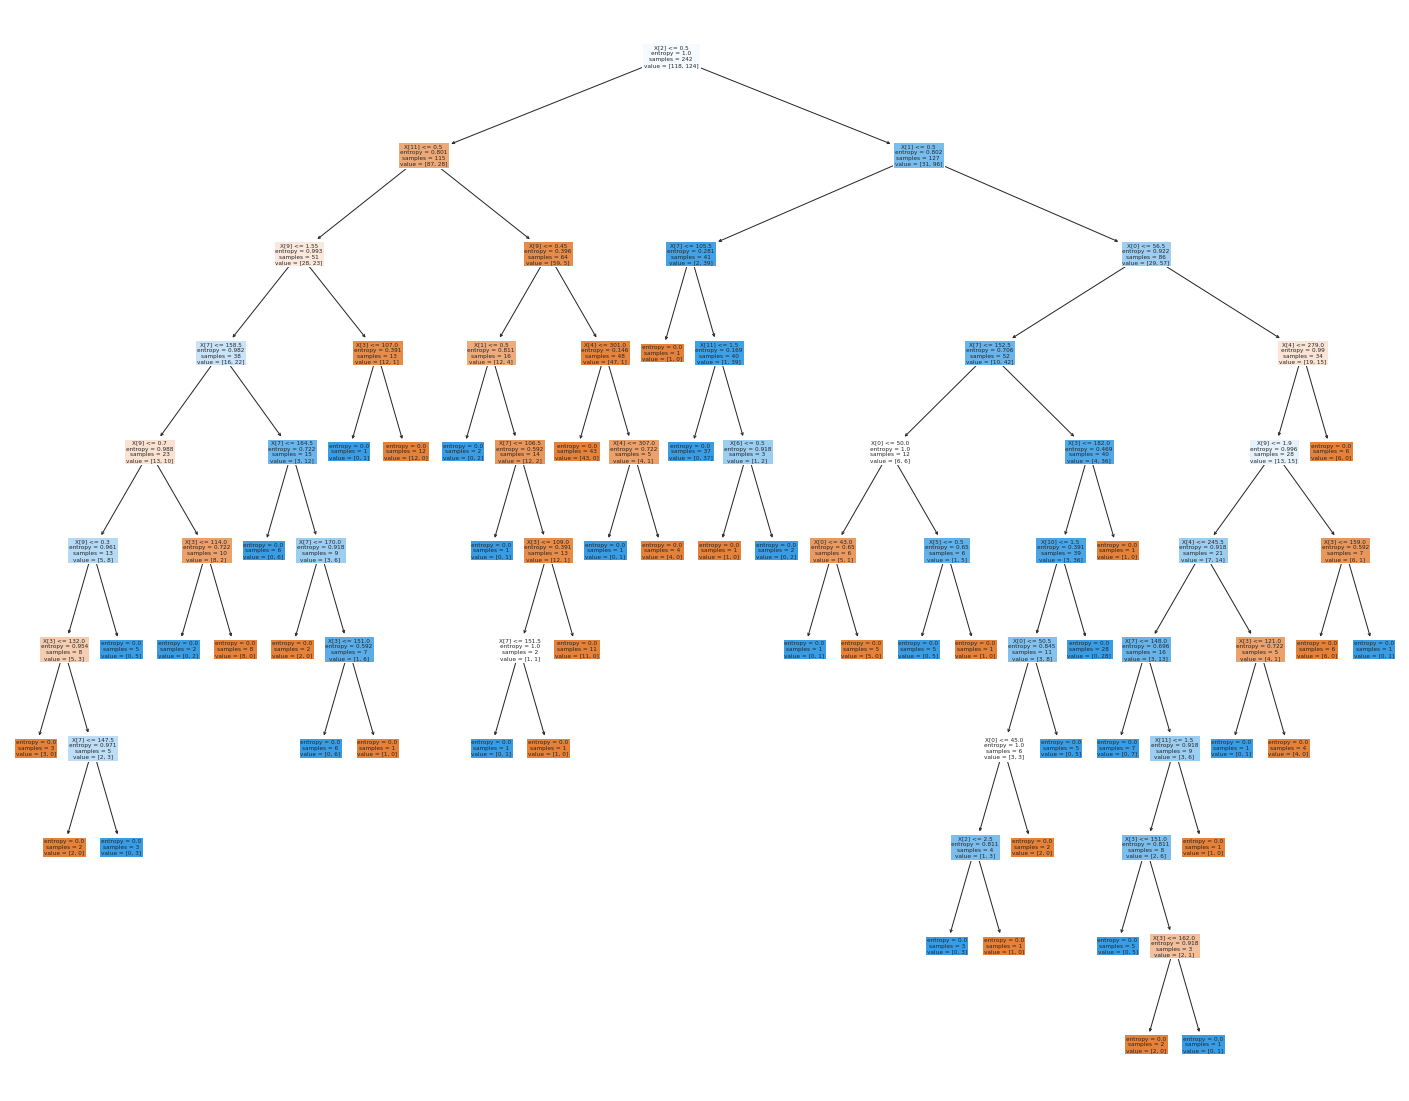

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(trees, filled=True)
plt.show()

**Ensemble Learning**

In [ ]:
# importing libraries 
from sklearn.ensemble import VotingClassifier ,BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from numpy import mean,std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.datasets import load_digits,load_breast_cancer
from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.svm import LinearSVR,SVR
#import xgboost 
from xgboost import XGBRegressor
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline
seed = 1075
np.random.seed(seed)

**Ensemble models**

In [ ]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

**Max voting/Voting classifier**

In [ ]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 

hard_voting.fit(x_train, y_train) 
y_pred = hard_voting.predict(x_test)  

**Accuracy**

In [ ]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


**Confusion matrix**

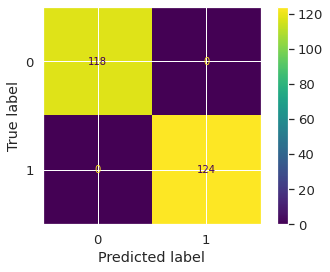

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(hard_voting, x_train, y_train)
plt.show()

In [ ]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(x_train, y_train) 
y_pred = soft_voting.predict(x_test) 

**Accuracy**

In [ ]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


**Confussion matrix**

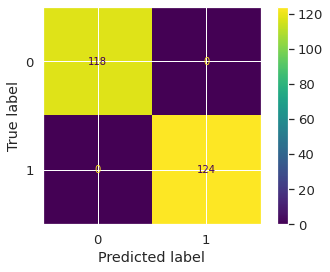

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(hard_voting, x_train, y_train)
plt.show()

**Averaging**

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

XX, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2, random_state=2)

**Accuracy**

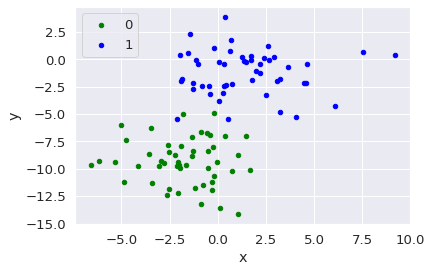

In [ ]:
# scatter plot, dots colored by class value
dfs = DataFrame(dict(x=XX[:,0], y=XX[:,1], label=y))
colors = {0:'green', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = dfs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**Weighted Averaging**

In [ ]:
models = [LinearRegression(),
             Ridge(),
             Lasso(alpha=0.01,max_iter=10000),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             SVR(),
             LinearSVR(),
             ElasticNet(alpha = 0.001,max_iter=10000),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             BayesianRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ExtraTreesRegressor(),
             XGBRegressor()
             ]

In [ ]:
names = ['LR','Ridge','Lasso','RF','GBR','SVR','LSVR','ENet','SGDR','BayRidge','Kernel','XTreeR','XGBR']

**Accuracy**

In [ ]:
# Define Root Mean Square Error 
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [ ]:
for model, name in zip(models,names):
    score = rmse_cv(model,x_train,y_train)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 0.389405, 0.044514
Ridge: 0.388931, 0.044085
Lasso: 0.389571, 0.040129
RF: 0.413416, 0.019881
GBR: 0.438923, 0.007453
SVR: 0.474474, 0.041272
LSVR: 0.450407, 0.088880
ENet: 0.389151, 0.044299
SGDR: 73934928542718.968750, 38841525072077.054688
BayRidge: 0.387563, 0.039198
Kernel: 0.454466, 0.052567
XTreeR: 0.410233, 0.040080
[04:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBR: 0.423952, 0.013146


In [ ]:
print(score.mean())

0.4239520230153702


**Stacking**

In [ ]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
stack_model = stacking(mod=[Lasso,Ridge,SVR,KernelRidge,ElasticNet,BayesianRidge],meta_model=KernelRidge)

**Accuracy**

In [ ]:
score = rmse_cv(stack_model,x_test,y_test)

In [ ]:
print(score.mean())

nan


**Blending**

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_train)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_train)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

**Accuracy**

In [ ]:
df_val=pd.concat([x_train, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9016393442622951

**Confussion matrix**

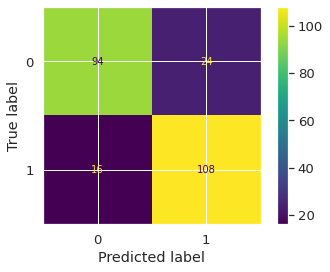

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_train, y_train)
plt.show()

**Bagging**

In [ ]:
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()

clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, x_train, y_train, cv=10,n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.801, std: (+/-) 0.080 [RandomForestClassifier]
Mean of: 0.793, std: (+/-) 0.063 [Bagging RandomForestClassifier]

Mean of: 0.792, std: (+/-) 0.068 [ExtraTreesClassifier]
Mean of: 0.793, std: (+/-) 0.078 [Bagging ExtraTreesClassifier]

Mean of: 0.633, std: (+/-) 0.124 [KNeighborsClassifier]
Mean of: 0.635, std: (+/-) 0.100 [Bagging KNeighborsClassifier]

Mean of: 0.660, std: (+/-) 0.071 [SVC]
Mean of: 0.604, std: (+/-) 0.055 [Bagging SVC]

Mean of: 0.780, std: (+/-) 0.063 [RidgeClassifier]
Mean of: 0.797, std: (+/-) 0.061 [Bagging RidgeClassifier]



**Accuracy**

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')

for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.81 (+/- 0.05) [Random Forest]
Accuracy: 0.80 (+/- 0.10) [Extra Trees]
Accuracy: 0.63 (+/- 0.12) [KNeighbors]
Accuracy: 0.66 (+/- 0.07) [SVC]
Accuracy: 0.78 (+/- 0.06) [Ridge Classifier]
Accuracy: 0.79 (+/- 0.08) [Ensemble]


**Boosting**

In [ ]:
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

**Accuracy**

In [ ]:
ada_boost.score(x_test,y_test)

0.8688524590163934

**Confussion matrix**

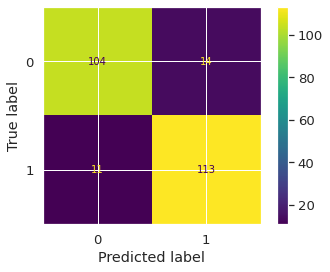

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ada_boost, x_train, y_train)
plt.show()

In [ ]:
grad_boost= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
grad_boost.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=1)

**Accuracy**

In [ ]:
grad_boost.score(x_test,y_test)

0.8688524590163934

**Confusion matrix**

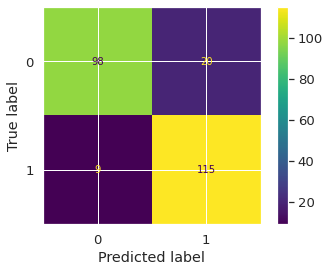

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grad_boost, x_train, y_train)
plt.show()

In [ ]:
xgb_boost=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_boost.fit(x_train, y_train)


XGBClassifier(learning_rate=0.01, random_state=1)

**Accuracy**

In [ ]:
xgb_boost.score(x_test,y_test)

0.8852459016393442

**Confussion matrix**

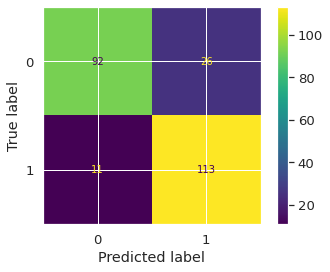

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_boost, x_train, y_train)
plt.show()

**Final Accuracy for boosting**

In [ ]:
eclf = VotingClassifier(estimators=[('Ada Boost', ada_boost), ('Grad Boost', grad_boost), ('XG Boost', xgb_boost)], voting='hard')
clf = [rf, et, knn, svc, rg]
for clf, label in zip([ada_boost, grad_boost, xgb_boost,eclf], ['Ada Boost','Grad Boost','XG Boost','Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.05) [Ada Boost]
Accuracy: 0.74 (+/- 0.06) [Grad Boost]
Accuracy: 0.73 (+/- 0.05) [XG Boost]
Accuracy: 0.74 (+/- 0.05) [Ensemble]
